### Benjamin Bartek bbartek@my365.bellevue.edu
### DSC 680 Project 3 -  2023 MLB Season Data Analysis

In [1]:

import pandas as pd

# Load the datasets with the correct delimiter
batting_df = pd.read_csv("2023 MLB Player Stats - Batting.csv", encoding="latin1", delimiter=";")
pitching_df = pd.read_csv("2023 MLB Player Stats - Pitching.csv", encoding="latin1", delimiter=";")

# Verify dataset structure
batting_df.head(), pitching_df.head()


(   Rk              Name  Age   Tm  Lg   G   PA   AB   R    H  ...    OBP  \
 0   1        CJ Abrams*   22  WSN  NL  89  340  316  47   82  ...  0.306   
 1   2        José Abreu   36  HOU  AL  95  400  368  33   90  ...  0.293   
 2   3  Ronald Acuna Jr.   25  ATL  NL  97  446  391  86  129  ...  0.408   
 3   4      Willy Adames   27  MIL  NL  89  383  336  44   71  ...  0.291   
 4   5       Riley Adams   27  WSN  NL  23   87   79   4   22  ...  0.337   
 
      SLG    OPS  OPS+   TB  GDP  HBP  SH  SF  IBB  
 0  0.434  0.739   105  137    5    8   3   0    0  
 1  0.353  0.646    79  130   11    3   0   5    1  
 2  0.578  0.986   160  226    7    4   0   2    2  
 3  0.411  0.702    90  138    9    3   0   5    0  
 4  0.506  0.844   133   40    4    1   1   0    0  
 
 [5 rows x 29 columns],
    Rk            Name  Age   Tm  Lg  W  L   W-L%   ERA   G  ...  WP   BF  \
 0   1  Fernando Abad*   37  COL  NL  1  0  1.000  4.26   6  ...   0   32   
 1   2  Andrew Abbott*   24  CIN  NL  

## **Descriptive Statistics**
Summary of key batting and pitching metrics.

In [3]:
# Summary statistics
batting_summary = batting_df.describe()
pitching_summary = pitching_df.describe()

batting_summary, pitching_summary


(               Rk         Age           G          PA          AB           R  \
 count  695.000000  695.000000  695.000000  695.000000  695.000000  695.000000   
 mean   348.000000   28.316547   45.000000  163.297842  145.823022   19.823022   
 std    200.773504    3.588799   33.889633  142.098584  126.431442   19.150896   
 min      1.000000   21.000000    1.000000    0.000000    0.000000    0.000000   
 25%    174.500000   26.000000   11.000000   25.000000   22.500000    2.000000   
 50%    348.000000   28.000000   43.000000  135.000000  121.000000   14.000000   
 75%    521.500000   31.000000   77.000000  281.000000  251.000000   34.000000   
 max    695.000000   42.000000   99.000000  463.000000  418.000000   86.000000   
 
                 H          2B          3B          HR  ...         OBP  \
 count  695.000000  695.000000  695.000000  695.000000  ...  695.000000   
 mean    36.109353    7.330935    0.620144    5.073381  ...    0.259964   
 std     33.804909    7.451852    1

## **Team-Based Performance Analysis**
Aggregating batting and pitching stats per team.

In [4]:
# Team-based performance analysis
team_batting = batting_df.groupby("Tm")[["BA", "OBP", "SLG", "OPS", "HR", "RBI"]].mean().sort_values("OPS", ascending=False)
team_pitching = pitching_df.groupby("Tm")[["ERA", "WHIP", "SO", "BB9", "HR9"]].mean().sort_values("ERA")

team_batting, team_pitching


(           BA       OBP       SLG       OPS        HR        RBI
 Tm                                                              
 MIL  0.265739  0.331696  0.395217  0.726826  4.478261  17.217391
 PHI  0.244889  0.309667  0.386056  0.695556  6.055556  23.388889
 MIA  0.258737  0.310632  0.378316  0.689000  4.789474  20.578947
 TBR  0.231375  0.289125  0.396062  0.685000  9.250000  32.125000
 WSN  0.239941  0.321353  0.355941  0.677529  5.176471  23.411765
 LAA  0.222654  0.295846  0.377731  0.673462  5.807692  18.230769
 NYY  0.209810  0.282286  0.385333  0.667667  6.619048  19.761905
 OAK  0.223955  0.298091  0.360409  0.658591  4.318182  15.863636
 MIN  0.214286  0.282048  0.370095  0.651952  6.333333  19.619048
 ATL  0.221429  0.273095  0.353952  0.627000  8.809524  25.047619
 CLE  0.223765  0.290824  0.331706  0.622588  4.176471  22.411765
 TOR  0.222900  0.292300  0.325550  0.617800  5.550000  20.950000
 SDP  0.199696  0.259913  0.356130  0.616000  5.478261  18.826087
 NYM  0.20

## **Team Performance Visualizations**
Comparing team OPS and ERA rankings.

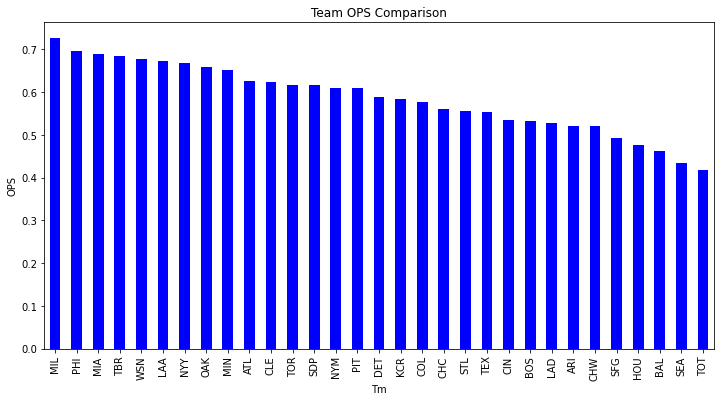

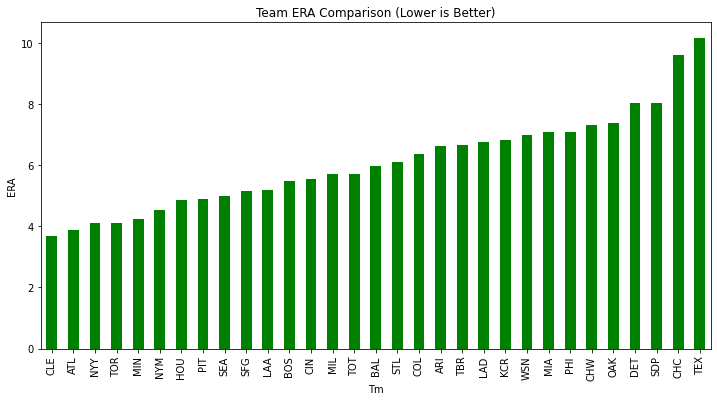

In [5]:
import matplotlib.pyplot as plt

# Team OPS Comparison
plt.figure(figsize=(12, 6))
team_batting.sort_values("OPS", ascending=False)["OPS"].plot(kind="bar", color="blue")
plt.title("Team OPS Comparison")
plt.ylabel("OPS")
plt.xticks(rotation=90)
plt.show()

# Team ERA Comparison
plt.figure(figsize=(12, 6))
team_pitching.sort_values("ERA")["ERA"].plot(kind="bar", color="green")
plt.title("Team ERA Comparison (Lower is Better)")
plt.ylabel("ERA")
plt.xticks(rotation=90)
plt.show()


## **Correlation Analysis**
Exploring relationships between player performance metrics.

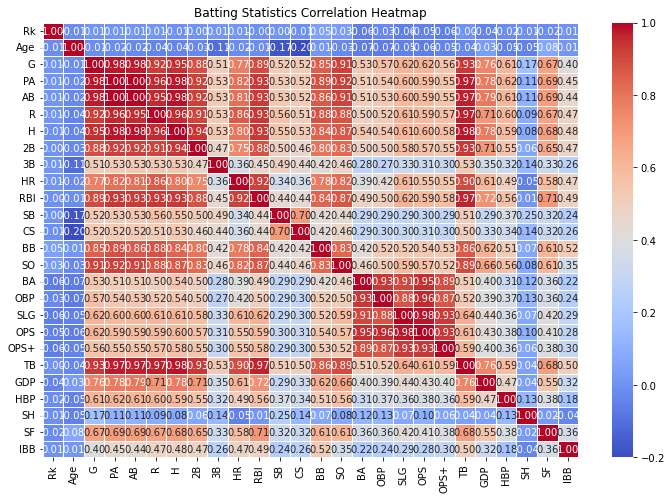

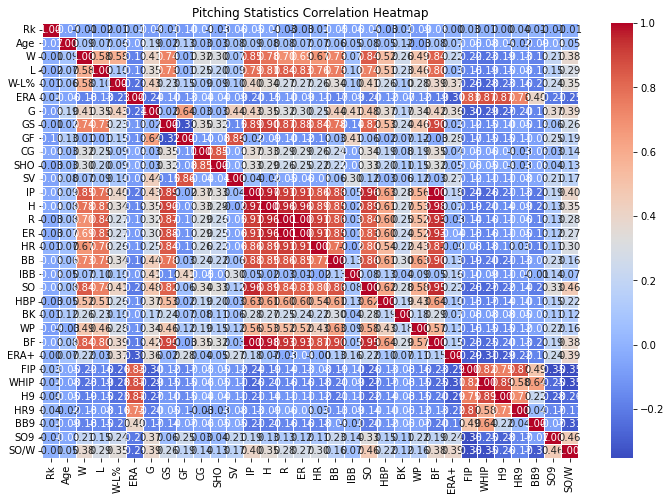

In [6]:
import seaborn as sns

# Correlation matrices
batting_corr = batting_df.corr()
pitching_corr = pitching_df.corr()

# Heatmap for batting stats
plt.figure(figsize=(12, 8))
sns.heatmap(batting_corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Batting Statistics Correlation Heatmap")
plt.show()

# Heatmap for pitching stats
plt.figure(figsize=(12, 8))
sns.heatmap(pitching_corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Pitching Statistics Correlation Heatmap")
plt.show()


## **Predictive Modeling**
Using regression to predict player success.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Batting regression (Predicting OPS)
batting_features = ["BA", "OBP", "SLG", "HR", "RBI", "BB", "SO"]
batting_df = batting_df.dropna(subset=batting_features + ["OPS"])
X_batting = batting_df[batting_features]
y_batting = batting_df["OPS"]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_batting, y_batting, test_size=0.2, random_state=42)
batting_model = LinearRegression()
batting_model.fit(X_train_b, y_train_b)
y_pred_b = batting_model.predict(X_test_b)

batting_mse = mean_squared_error(y_test_b, y_pred_b)
batting_r2 = r2_score(y_test_b, y_pred_b)

# Pitching regression (Predicting ERA)
pitching_features = ["SO", "WHIP", "BB9", "H9", "HR9", "SO/W"]
pitching_df = pitching_df.dropna(subset=pitching_features + ["ERA"])
X_pitching = pitching_df[pitching_features]
y_pitching = pitching_df["ERA"]

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pitching, y_pitching, test_size=0.2, random_state=42)
pitching_model = LinearRegression()
pitching_model.fit(X_train_p, y_train_p)
y_pred_p = pitching_model.predict(X_test_p)

pitching_mse = mean_squared_error(y_test_p, y_pred_p)
pitching_r2 = r2_score(y_test_p, y_pred_p)

# Display model performance
pd.DataFrame({
    "Model": ["Batting OPS Prediction", "Pitching ERA Prediction"],
    "Mean Squared Error": [batting_mse, pitching_mse],
    "R-Squared": [batting_r2, pitching_r2]
})


,Model,Mean Squared Error,R-Squared
0,Batting OPS Prediction,1.653502e-07,0.999998
1,Pitching ERA Prediction,7.407793e+00,0.913322


## **Feature Importance in Predictive Models**
Using Random Forest to analyze the most impactful features.

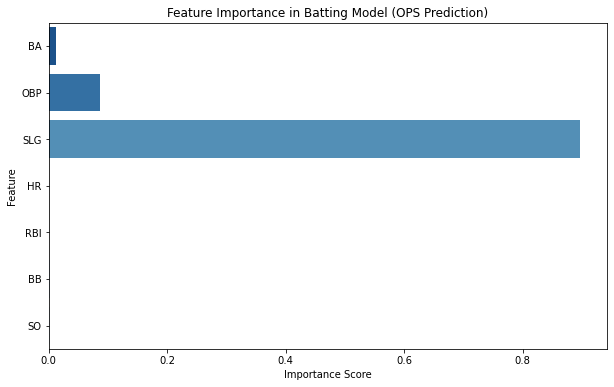

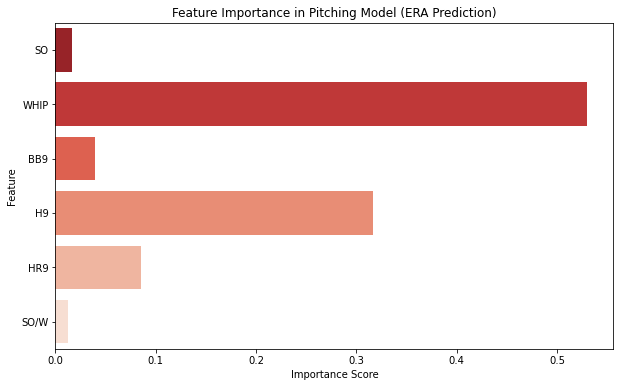

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Feature importance for batting model
rf_batting = RandomForestRegressor(n_estimators=100, random_state=42)
rf_batting.fit(X_train_b, y_train_b)
importances_batting = rf_batting.feature_importances_
features_batting = X_batting.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_batting, y=features_batting, palette="Blues_r")
plt.title("Feature Importance in Batting Model (OPS Prediction)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Feature importance for pitching model
rf_pitching = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pitching.fit(X_train_p, y_train_p)
importances_pitching = rf_pitching.feature_importances_
features_pitching = X_pitching.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_pitching, y=features_pitching, palette="Reds_r")
plt.title("Feature Importance in Pitching Model (ERA Prediction)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
